In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/test.csv")
data_test = pd.read_csv("/content/drive/MyDrive/train.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data.head()

In [ ]:
data.tail()

In [ ]:
data.shape

In [ ]:
print("Number of Rows",data.shape[0])
print("Number of columns",data.shape[1])

In [ ]:
data.duplicated().any()

In [ ]:
duplicated_columns = data.columns[data.T.duplicated()].tolist()

In [ ]:
len(duplicated_columns)

In [ ]:
data = data.drop(duplicated_columns,axis=1)

In [ ]:
data.shape

In [ ]:
data.isnull().sum()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.countplot(data['Activity'])
desired_color='green'
plt.xticks(rotation=35,color=desired_color)
plt.show()

In [ ]:
X = data.drop('Activity',axis=1)
y= data['Activity']

In [ ]:
y

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
y

In [ ]:
print(globals())

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,
                                               random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
log  = LogisticRegression()
log.fit(X_train,y_train)

In [ ]:
y_pred1 = log.predict(X_test)
accuracy_score(y_test,y_pred1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

In [ ]:
y_pred2 = rf.predict(X_test)
accuracy_score(y_test,y_pred2)

In [ ]:
from sklearn.feature_selection import SelectKBest,f_classif

In [ ]:
k=200
selector = SelectKBest(f_classif,k=k)
X_train_selected = selector.fit_transform(X_train,y_train)
X_test_selected = selector.transform(X_test)


selected_indices=selector.get_support(indices=True)
selected_features = X_train.columns[selected_indices]
print(len(selected_features))

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [ ]:
estimator = RandomForestClassifier()

In [32]:
k=100
rfe_selector = RFE(estimator,n_features_to_select=k)
X_train_selected_rfe = rfe_selector.fit_transform(X_train_selected,y_train)
X_test_selected_rfe = rfe_selector.transform(X_test_selected)

selected_indices_rfe = rfe_selector.get_support(indices=True)
selected_features_rfe = selected_features[selected_indices_rfe]
print(selected_features_rfe)

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-max()-X',
       'tBodyAcc-energy()-X', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y',
       'tBodyAcc-entropy()-X', 'tGravityAcc-mean()-X', 'tGravityAcc-max()-X',
       'tGravityAcc-min()-X', 'tGravityAcc-energy()-X',
       'tGravityAcc-energy()-Y', 'tBodyAccJerk-std()-X',
       'tBodyAccJerk-std()-Y', 'tBodyAccJerk-std()-Z', 'tBodyAccJerk-mad()-X',
       'tBodyAccJerk-mad()-Y', 'tBodyAccJerk-mad()-Z', 'tBodyAccJerk-max()-X',
       'tBodyAccJerk-sma()', 'tBodyAccJerk-iqr()-X',
       'tBodyAccJerk-entropy()-X', 'tBodyGyro-std()-X', 'tBodyGyro-std()-Y',
       'tBodyGyro-std()-Z', 'tBodyGyro-mad()-X', 'tBodyGyro-mad()-Y',
       'tBodyGyro-mad()-Z', 'tBodyGyro-max()-X', 'tBodyGyro-max()-Z',
       'tBodyGyro-min()-X', 'tBodyGyro-sma()', 'tBodyGyro-iqr()-X',
       'tBodyGyro-iqr()-Y', 'tBodyGyro-iqr()-Z', 'tBodyGyroJerk-std()-X',
       'tBodyGyroJerk-std()-Y', 'tB

In [33]:
print(len(selected_features_rfe))

100


In [34]:
rf = RandomForestClassifier()

In [35]:
rf.fit(X_train_selected_rfe,y_train)

RandomForestClassifier()

In [36]:
y_pred_rf = rf.predict(X_test_selected_rfe)


In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test,y_pred_rf)


0.964406779661017

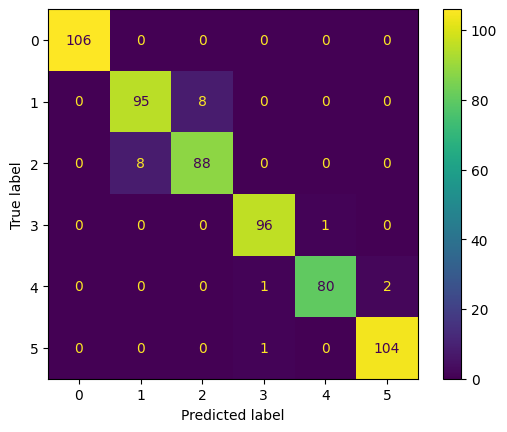

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_rf)
disp= ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()



In [40]:
import joblib

In [41]:
joblib.dump(rf,"model_rfe")

['model_rfe']

In [42]:
joblib.dump(selector,"k_best_selector")

['k_best_selector']

In [43]:
joblib.dump(rfe_selector,"rfe_selector")

['rfe_selector']

In [44]:
data_test=data_test.drop("Activity",axis=1)

In [45]:
duplicated_columns = data_test.columns[data_test.T.duplicated()].to_list()

In [46]:
data_test = data_test.drop(duplicated_columns,axis=1)

In [47]:
model = joblib.load('model_rfe')

In [48]:
selector = joblib.load('k_best_selector')

In [49]:
rfe_selector = joblib.load('rfe_selector')

In [50]:
selector=selector.transform(data_test)

In [51]:
X_test_selected_rfe = rfe_selector.transform(selector)


In [52]:
model.predict(X_test_selected_rfe)

array([2, 2, 2, ..., 5, 5, 5])

In [ ]:
!sudo apt-get install python3-tk

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-tk is already the newest version (3.10.8-1~22.04).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!apt-get install python3-tk

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-tk is already the newest version (3.10.8-1~22.04).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!pip install tkinter
!pip install pandas
!pip install joblib

In [ ]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
import joblib
from tkinter import messagebox
import os

if not os.environ.get('DISPLAY'):
    raise RuntimeError('No display found. Please run this script on a machine with a display environment.')

def open_file():
    filepath=filedialog.askopenfile(filetypes=[("CSV Files",".csv")])
    if filepath:
        try:
            data=pd.read_csv(filepath)
            process_data(data)
        except Exception as e:
            messagebox.showerror("Error",f"Failed to open file {e}")

def process_data(data):
    # Find columns with the same values
    #data= data.drop("Activity",axis=1)
    duplicated_columns = data.columns[data.T.duplicated()].tolist()
    # Remove columns with the same values

    data_test = data.drop(duplicated_columns, axis=1)

    model = joblib.load("model_rfe")
    # Load the SelectKBest object from the file
    selector = joblib.load('k_best_selector')
    rfe_selector = joblib.load('rfe_selector')

    # Transform the new data using the loaded SelectKBest object
    X_test_selected = selector.transform(data_test)

    # Transform the new data using the loaded RFE object
    X_test_selected_rfe = rfe_selector.transform(X_test_selected)
    y_pred=model.predict(X_test_selected_rfe)
    # standing : 0, sitting : 1,laying : 2, WALKING_DOWNSTAIRS: 3,
    # walking_upstairs:4,walking : 5
    y_pred = pd.Series(y_pred)
    y_pred = y_pred.map({0: 'Standing',1:'Sitting',2:'Laying',
                        3: 'Walking_downstairs',4: 'Walking_upstairs',
                        5:"Walking"})
    data['Predicted_target']=y_pred
    save_file(data)

def save_file(data):
    savepath=filedialog.asksaveasfilename(defaultextension=".csv",
                              filetypes=[("CSV Files",".csv")])
    if savepath:
        try:
            data.to_csv(savepath)
            messagebox.showinfo("Success","File Saved Successfully")
        except Exception as e:
            messagebox.showerror("Error",f"Failed to save file:{e}")


# Create a Tkinter GUI

root = tk.Tk()

root.title("Classification")

root.geometry("200x200")

button1 = tk.Button(root,text="Open CSV File",
                   width=15,
                   height=2,
                   background="lightgreen",
                   activebackground="lightblue",
                   font=("Arial",11,"bold"),
                   command=open_file)

button1.pack(pady=50)

root.mainloop()

RuntimeError: No display found. Please run this script on a machine with a display environment.